In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers, regularizers
import matplotlib.pyplot as plt

In [7]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

e:\Programacion\IA\CNN\tf_gpu_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    )

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
train_generator = train_datagen.flow_from_directory('./files/cats_and_dogs/train', 
                                  target_size=(150,150), 
                                  batch_size=32, 
                                  class_mode='binary'
                                  )
validation_generator = test_datagen.flow_from_directory('./files/cats_and_dogs/test', 
                                  target_size=(150,150), 
                                  batch_size=32, 
                                  class_mode='binary'
                                  )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
checkpoint = ModelCheckpoint('model_dogs_cats.keras', monitor='val_accuracy', save_best_only=True)

In [15]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(), metrics=['accuracy'])

In [17]:
hist = model.fit(train_generator, 
                 steps_per_epoch=2000//32, 
                 epochs=100, 
                 validation_data=validation_generator, 
                 validation_steps=1000//32, 
                 callbacks=[checkpoint]
                 )

e:\Programacion\IA\CNN\tf_gpu_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 858ms/step - accuracy: 0.4809 - loss: 0.7069

e:\Programacion\IA\CNN\tf_gpu_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.4811 - loss: 0.7067 - val_accuracy: 0.5000 - val_loss: 0.7023
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.4062 - loss: 0.7323 - val_accuracy: 0.5000 - val_loss: 0.7066
Epoch 3/100


C:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


62/62 ━━━━━━━━━━━━━━━━━━━━ 26s 420ms/step - accuracy: 0.4968 - loss: 0.6946 - val_accuracy: 0.5010 - val_loss: 0.7079
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.5000 - loss: 0.7127 - val_accuracy: 0.5000 - val_loss: 0.6991
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 25s 409ms/step - accuracy: 0.5344 - loss: 0.6866 - val_accuracy: 0.5302 - val_loss: 0.6879
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5938 - loss: 0.6901 - val_accuracy: 0.6250 - val_loss: 0.7053
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 25s 406ms/step - accuracy: 0.5429 - loss: 0.6822 - val_accuracy: 0.5222 - val_loss: 0.6875
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.5312 - loss: 0.6845 - val_accuracy: 0.6250 - val_loss: 0.6635
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 26s 421ms/step - accuracy: 0.5194 - loss: 0.6916 - val_accuracy: 0.5292 - val_loss: 0.6899
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.4688 - loss: 0.6926 - val_accuracy: 0.1

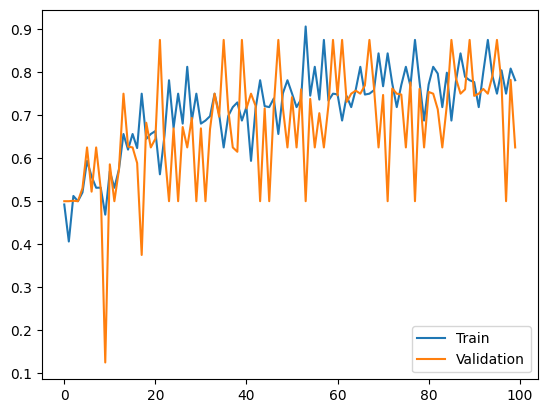

In [20]:
plt.plot(hist.history['accuracy'], label='Train')
plt.plot(hist.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

In [21]:
model.load_weights('model_dogs_cats.keras')
model.evaluate(validation_generator, steps=1000//32)

31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.6707 - loss: 0.6165


[0.6163901090621948, 0.6663306355476379]